# DigitClassifier

In [0]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [0]:
data = datasets.load_digits()

In [53]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [54]:
data

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [55]:
data.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [56]:
data.data.shape  #single dimension

(1797, 64)

In [57]:
data.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [58]:
data.images  #2d  , 1797 images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [59]:
data.images.shape  #2D

(1797, 8, 8)

In [60]:
data.images[1796]

array([[ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  2., 16., 14.,  6.,  1.,  0.,  0.],
       [ 0.,  0., 15., 15.,  8., 15.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 10.,  0.,  0.],
       [ 0.,  0., 12., 15., 15., 12.,  0.,  0.],
       [ 0.,  4., 16.,  6.,  4., 16.,  6.,  0.],
       [ 0.,  8., 16., 10.,  8., 16.,  8.,  0.],
       [ 0.,  1.,  8., 12., 14., 12.,  1.,  0.]])

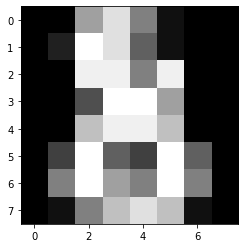

In [61]:
plt.imshow(data.images[1796], cmap='gray')

In [62]:
data.target[1796]

8

In [0]:
plt.imsave('num.png',data.images[1796])

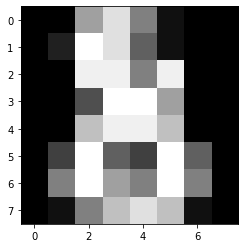

In [64]:
plt.imshow(data.images[1796], cmap='gray')

In [0]:
scaler = MinMaxScaler()

In [66]:
scaler.fit(data.data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [67]:
data.data[0]     #image 

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [0]:
scaled_training_data = scaler.transform(data.data)

In [69]:
scaled_training_data[0]  #scaling doesn't change Value

array([0.        , 0.        , 0.3125    , 0.8125    , 0.5625    ,
       0.0625    , 0.        , 0.        , 0.        , 0.        ,
       0.8125    , 0.9375    , 0.625     , 0.9375    , 0.3125    ,
       0.        , 0.        , 0.1875    , 0.9375    , 0.125     ,
       0.        , 0.6875    , 0.5       , 0.        , 0.        ,
       0.26666667, 0.75      , 0.        , 0.        , 0.5       ,
       0.53333333, 0.        , 0.        , 0.35714286, 0.5       ,
       0.        , 0.        , 0.5625    , 0.57142857, 0.        ,
       0.        , 0.25      , 0.6875    , 0.        , 0.0625    ,
       0.75      , 0.4375    , 0.        , 0.        , 0.125     ,
       0.875     , 0.3125    , 0.625     , 0.75      , 0.        ,
       0.        , 0.        , 0.        , 0.375     , 0.8125    ,
       0.625     , 0.        , 0.        , 0.        ])

In [70]:
scaled_training_data[0].reshape(8,8)

array([[0.        , 0.        , 0.3125    , 0.8125    , 0.5625    ,
        0.0625    , 0.        , 0.        ],
       [0.        , 0.        , 0.8125    , 0.9375    , 0.625     ,
        0.9375    , 0.3125    , 0.        ],
       [0.        , 0.1875    , 0.9375    , 0.125     , 0.        ,
        0.6875    , 0.5       , 0.        ],
       [0.        , 0.26666667, 0.75      , 0.        , 0.        ,
        0.5       , 0.53333333, 0.        ],
       [0.        , 0.35714286, 0.5       , 0.        , 0.        ,
        0.5625    , 0.57142857, 0.        ],
       [0.        , 0.25      , 0.6875    , 0.        , 0.0625    ,
        0.75      , 0.4375    , 0.        ],
       [0.        , 0.125     , 0.875     , 0.3125    , 0.625     ,
        0.75      , 0.        , 0.        ],
       [0.        , 0.        , 0.375     , 0.8125    , 0.625     ,
        0.        , 0.        , 0.        ]])

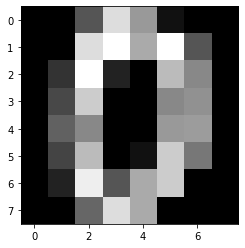

In [71]:
plt.imshow(scaled_training_data[0].reshape(8,8),cmap='gray')

In [0]:
clf = svm.SVC(gamma = .25, C = 10000)

In [73]:
clf.fit(scaled_training_data, data.target)

SVC(C=10000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.25, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
img = Image.open("index.png").convert('L')

In [102]:
img

In [0]:
img = img.resize((8,8),Image.ANTIALIAS)

In [77]:
img

In [0]:
px = img.load()

In [79]:
px[0,0]

255

In [0]:
myLi = []
for i in range(0,8):
    for j in range(0,8):
        myLi.append(px[j,i])

In [81]:
len(myLi)

64

In [82]:
myLi

[255,
 255,
 254,
 255,
 249,
 255,
 255,
 255,
 255,
 253,
 255,
 184,
 117,
 255,
 253,
 255,
 254,
 254,
 231,
 95,
 242,
 254,
 254,
 255,
 251,
 255,
 126,
 79,
 183,
 249,
 254,
 255,
 253,
 255,
 108,
 175,
 75,
 230,
 255,
 254,
 253,
 255,
 172,
 92,
 166,
 255,
 253,
 255,
 255,
 255,
 255,
 246,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 252,
 255,
 255,
 255]

In [0]:
arr = np.array(myLi)

In [84]:
arr

array([255, 255, 254, 255, 249, 255, 255, 255, 255, 253, 255, 184, 117,
       255, 253, 255, 254, 254, 231,  95, 242, 254, 254, 255, 251, 255,
       126,  79, 183, 249, 254, 255, 253, 255, 108, 175,  75, 230, 255,
       254, 253, 255, 172,  92, 166, 255, 253, 255, 255, 255, 255, 246,
       255, 255, 255, 255, 255, 255, 255, 255, 252, 255, 255, 255])

In [85]:
arr.reshape(8,8)

array([[255, 255, 254, 255, 249, 255, 255, 255],
       [255, 253, 255, 184, 117, 255, 253, 255],
       [254, 254, 231,  95, 242, 254, 254, 255],
       [251, 255, 126,  79, 183, 249, 254, 255],
       [253, 255, 108, 175,  75, 230, 255, 254],
       [253, 255, 172,  92, 166, 255, 253, 255],
       [255, 255, 255, 246, 255, 255, 255, 255],
       [255, 255, 255, 255, 252, 255, 255, 255]])

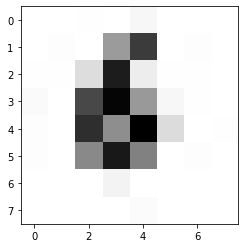

In [86]:
plt.imshow(arr.reshape(8,8),cmap='gray')

In [0]:
sc = MinMaxScaler()

In [88]:
arr.reshape(-1, 1)

array([[255],
       [255],
       [254],
       [255],
       [249],
       [255],
       [255],
       [255],
       [255],
       [253],
       [255],
       [184],
       [117],
       [255],
       [253],
       [255],
       [254],
       [254],
       [231],
       [ 95],
       [242],
       [254],
       [254],
       [255],
       [251],
       [255],
       [126],
       [ 79],
       [183],
       [249],
       [254],
       [255],
       [253],
       [255],
       [108],
       [175],
       [ 75],
       [230],
       [255],
       [254],
       [253],
       [255],
       [172],
       [ 92],
       [166],
       [255],
       [253],
       [255],
       [255],
       [255],
       [255],
       [246],
       [255],
       [255],
       [255],
       [255],
       [255],
       [255],
       [255],
       [255],
       [252],
       [255],
       [255],
       [255]])

In [89]:
arr = arr.reshape(-1, 1)
sc.fit(arr)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
arr2 = sc.transform(arr)

In [0]:
arr2 = arr2.ravel() #1d

In [92]:
arr2

array([1.        , 1.        , 0.99444444, 1.        , 0.96666667,
       1.        , 1.        , 1.        , 1.        , 0.98888889,
       1.        , 0.60555556, 0.23333333, 1.        , 0.98888889,
       1.        , 0.99444444, 0.99444444, 0.86666667, 0.11111111,
       0.92777778, 0.99444444, 0.99444444, 1.        , 0.97777778,
       1.        , 0.28333333, 0.02222222, 0.6       , 0.96666667,
       0.99444444, 1.        , 0.98888889, 1.        , 0.18333333,
       0.55555556, 0.        , 0.86111111, 1.        , 0.99444444,
       0.98888889, 1.        , 0.53888889, 0.09444444, 0.50555556,
       1.        , 0.98888889, 1.        , 1.        , 1.        ,
       1.        , 0.95      , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.98333333, 1.        , 1.        , 1.        ])

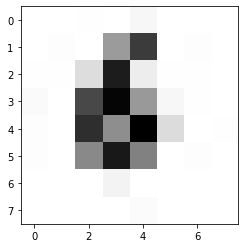

In [93]:
plt.imshow(arr2.reshape(8,8), cmap='gray')

In [0]:
arr2 = 1 - arr2

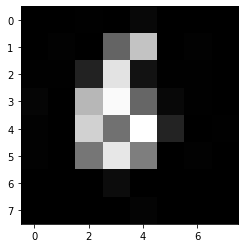

In [95]:
plt.imshow(arr2.reshape(8,8),cmap='gray')

In [101]:
clf.predict([arr2])[0]

4